In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
layers = tf.keras.layers

In [2]:
print(tf.__version__)
print(tf.keras.__version__)

2.10.0
2.10.0


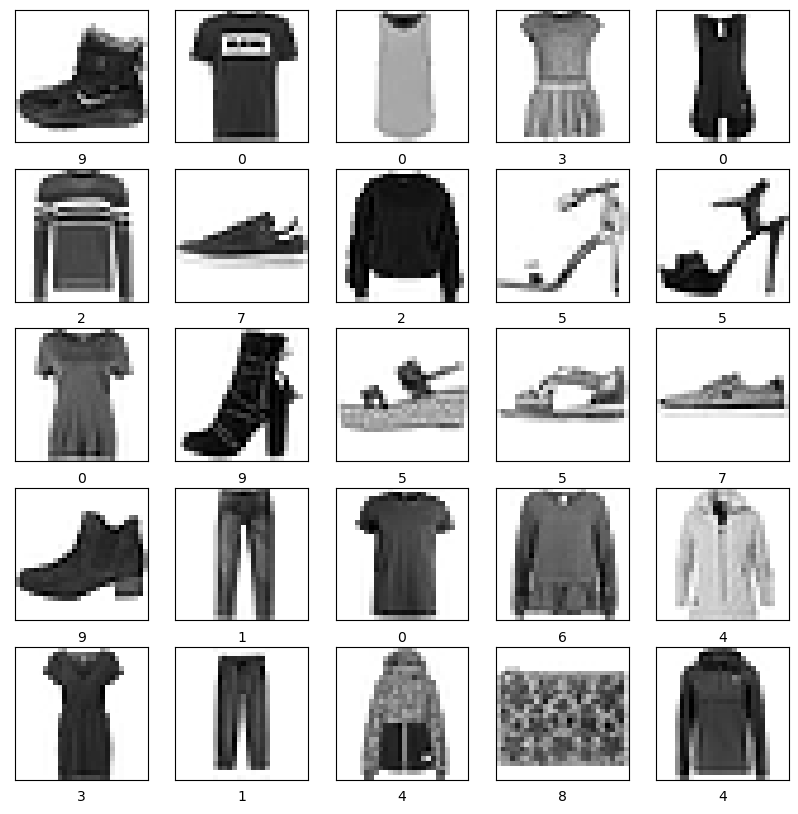

In [14]:
#ddownload fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist

#set up training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

#plot each category
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [23]:
#build model layer by layer
model = tf.keras.Sequential() #sequential model
model.add(layers.Flatten()) #flatten input
model.add(layers.Dense(128, activation='relu')) #dense layer with 64 nodes
model.add(layers.Dense(128, activation='relu')) #dense layer with 64 nodes
model.add(layers.Dense(10, activation='softmax')) #dense layer with 10 nodes

#compile model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#fit model
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4855 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3673 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3314 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3028 - accuracy: 0.8879
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2883 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2720 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2623 - accuracy: 0.9023
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2502 - accuracy: 0.9061
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2405 - accuracy: 0.9098
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.23

313/313 [==============================] - 1s 2ms/step


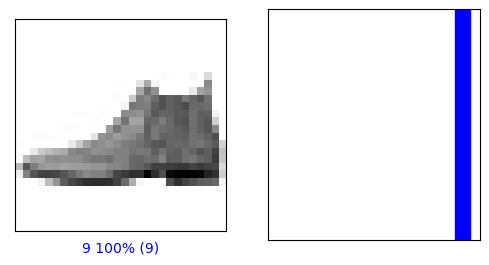

In [24]:
#plot predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

#plot predictions
predictions = model.predict(x_test)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


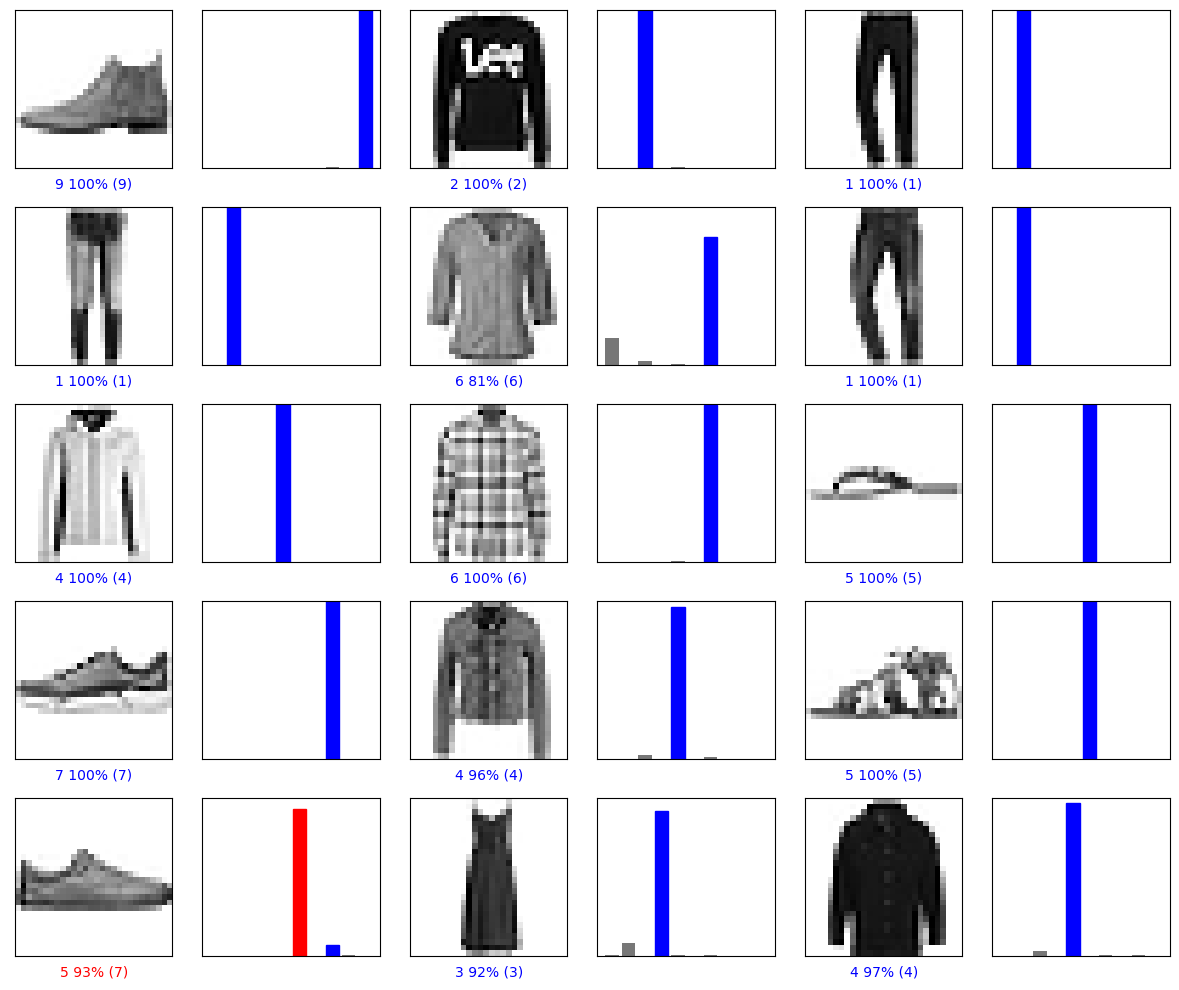

In [25]:
#confirms predictions
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [26]:
#evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.3478 - accuracy: 0.8806
